In [31]:
__author__ = "@Tssp"
__date__ = "30/12/20"
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

$$ V(x) = V_0(k x)^2 - \frac{1}{3}V_0(k x)^4 + \frac{2}{45}V_0(k x)^6 $$

In [27]:
Ix     = 4993 / 6.436409310e15 # Laser intensity in mW/cm2 X
Iy     = 4993 / 6.436409310e15 # Laser intensity in mW/cm2 Y
Iz     = 50 / 6.436409310e15   # Laser intensity in mW/cm2 Z
wL     = 1000 / 0.0529177249   # Wavelength in nm
hbar   = 1                     # Planck reduced Constant
m      = 12789.3927072494/2    # Li mass in a.u
alpha  = 200                   # Polarization a.u
k      = 2*pi/wL
Vx     = alpha * Ix
Vy     = alpha * Iy
Vz     = alpha * Iz
x      = np.linspace(-20000, 20000, 1000)
y      = np.linspace(-20000, 20000, 1000)

In [17]:
def V(x, k, Vo, m):
    return Vo*(k*x)**2 - 1/3*Vo*(k*x)**4 + 2/45*Vo*(k*x)**6

In [18]:
X, Y = np.meshgrid(x, y)

In [19]:
V_z = (V(X, k, Vx, m) + V(Y, k, Vy, m))/(np.sqrt(2 * np.abs(Vy)/m) * k)

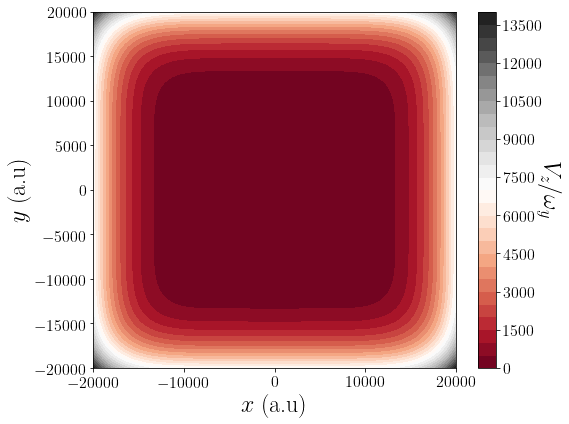

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contourf(X, Y, V_z, 30, cmap='RdGy')
cbar = plt.colorbar(CS)
ax.set_xlabel('$x$ (a.u)')
ax.set_ylabel('$y$ (a.u)')
cbar.ax.set_ylabel('$V_z/\omega_y$', rotation=-90, labelpad=20)
plt.tight_layout()

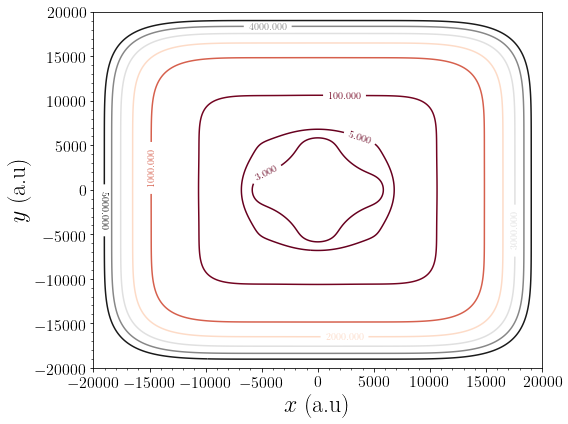

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contour(X, Y, V_z, levels=[3, 5, 100, 1000, 2000, 3000, 4000, 5000], cmap='RdGy')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('$x$ (a.u)')
ax.set_ylabel('$y$ (a.u)')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
cbar.ax.set_ylabel('$V_z/\omega_y$', rotation=-90, labelpad=20)
plt.tight_layout()
plt.savefig('General_figures/Potential_Contour.png', dpi=200)

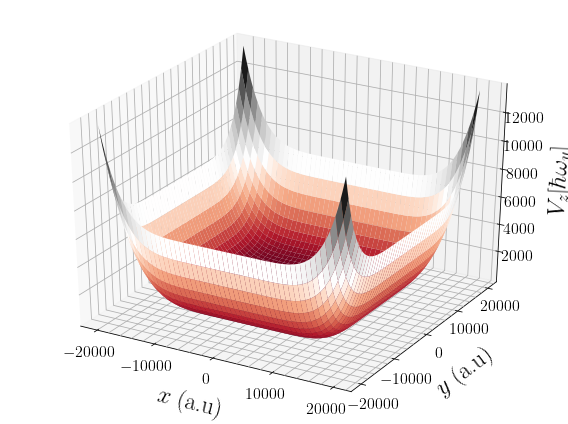

In [25]:
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, Y, V_z, cmap='RdGy')
plt.xticks([-20e3, -10e3, 0, 10e3, 20e3])
plt.yticks([-20e3, -10e3, 0, 10e3, 20e3])
plt.xlabel('$x$ (a.u)', labelpad=15)
plt.ylabel('$y$ (a.u)', labelpad=15)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.set_zlabel('$V_z[\hbar \omega_y]$', rotation=-90, labelpad=15)
plt.tight_layout()
plt.savefig('General_figures/Potential3d.png', dpi=200)

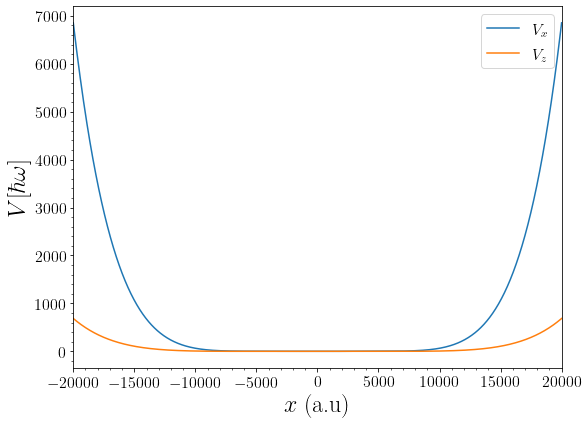

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, V(x, k, Vx, m)/(np.sqrt(2 * np.abs(Vx)/m) * k), label='$V_x$')
ax.plot(x, V(x, k, Vz, m)/(np.sqrt(2 * np.abs(Vz)/m) * k), label='$V_z$')
ax.set_xlabel('$x$ (a.u)')
ax.set_ylabel('$V[\hbar \omega]$')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.tight_layout()
plt.xlim(-20000, 20000)
plt.legend()
plt.savefig('General_figures/Potential2d.png', dpi=200)